## Importing the libraries

In [32]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

## Importing the cifar-10 dataset

In [60]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


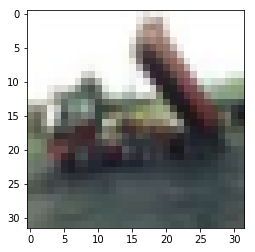

In [61]:
plt.imshow(x_train[2])

In [62]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [63]:
for i in range(len(labels)):      ## Checking for the number of samples present in train dataset
    print('The Training samples for {} is: {}'.format(labels[i].upper(), len(y_train[y_train==i])))

The Training samples for AIRPLANE is: 5000
The Training samples for AUTOMOBILE is: 5000
The Training samples for BIRD is: 5000
The Training samples for CAT is: 5000
The Training samples for DEER is: 5000
The Training samples for DOG is: 5000
The Training samples for FROG is: 5000
The Training samples for HORSE is: 5000
The Training samples for SHIP is: 5000
The Training samples for TRUCK is: 5000


In [64]:
for i in range(len(labels)):     ## Checking for the number of samples present in test dataset
    print('The Training samples for {} is: {}'.format(labels[i].upper(), len(y_test[y_test==i])))

The Training samples for AIRPLANE is: 1000
The Training samples for AUTOMOBILE is: 1000
The Training samples for BIRD is: 1000
The Training samples for CAT is: 1000
The Training samples for DEER is: 1000
The Training samples for DOG is: 1000
The Training samples for FROG is: 1000
The Training samples for HORSE is: 1000
The Training samples for SHIP is: 1000
The Training samples for TRUCK is: 1000


There are equal number of samples for all the categories in the training and testing dataset

## Pre-processing the dataset
We will scale the predictor features contained in x_train and x_test to values between 0 and 1. Then, we will use one-hot encoding for the categorical data present in y_train and y_test

In [67]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.
x_test = x_test/255.
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


## Simple CNN Model

We will be building a simple 4 layer Convolutional Neural Network for this dataset followed by maxpooling and flattening out of the network to make the predictions.

In [68]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))                 ## Dropout of 0.25 is used to prevent the model from overfitting. 

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))                 ## Dropout of 0.25 is used to prevent the model from overfitting. 

model.add(Flatten())                     ## Flattening out of the network to one dimensional vec
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))         ## Softmax activation is used for classfication of images

model.summary()         ## Here is the summary of all the layers in the CNN model

Adam optimization will be used here as it generally works well with most of the neural network architectures

In [70]:
adam = keras.optimizers.Adam(lr=0.0001)

In [71]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [66]:
num_classes = 10
batch_size = 32
epoch = 100

In [72]:
model.fit(x=x_train,             ## We will be fitting the training data and labels into the model
          y=y_train,
          validation_data=(x_test,y_test),
          batch_size=batch_size,
          epochs=epoch,
          verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 205s 4ms/step - loss: 1.7833 - acc: 0.3449 - val_loss: 1.5324 - val_acc: 0.4433
Epoch 2/100
50000/50000 [==============================] - 212s 4ms/step - loss: 1.4633 - acc: 0.4646 - val_loss: 1.3008 - val_acc: 0.5392
Epoch 3/100
50000/50000 [==============================] - 215s 4ms/step - loss: 1.3260 - acc: 0.5204 - val_loss: 1.1996 - val_acc: 0.5788
Epoch 4/100
50000/50000 [==============================] - 222s 4ms/step - loss: 1.2302 - acc: 0.5633 - val_loss: 1.1079 - val_acc: 0.6024
Epoch 5/100
50000/50000 [==============================] - 218s 4ms/step - loss: 1.1519 - acc: 0.5905 - val_loss: 1.0473 - val_acc: 0.6313
Epoch 6/100
50000/50000 [==============================] - 217s 4ms/step - loss: 1.0836 - acc: 0.6158 - val_loss: 1.0041 - val_acc: 0.6510
Epoch 7/100
50000/50000 [==============================] - 223s 4ms/step - loss: 1.0282 - acc: 0.6384 - val_loss: 0.

50000/50000 [==============================] - 203s 4ms/step - loss: 0.2497 - acc: 0.9113 - val_loss: 0.6535 - val_acc: 0.8013
Epoch 60/100
50000/50000 [==============================] - 205s 4ms/step - loss: 0.2427 - acc: 0.9140 - val_loss: 0.6430 - val_acc: 0.8007
Epoch 61/100
50000/50000 [==============================] - 204s 4ms/step - loss: 0.2436 - acc: 0.9121 - val_loss: 0.6618 - val_acc: 0.8029
Epoch 62/100
50000/50000 [==============================] - 205s 4ms/step - loss: 0.2336 - acc: 0.9157 - val_loss: 0.6693 - val_acc: 0.8018
Epoch 63/100
50000/50000 [==============================] - 204s 4ms/step - loss: 0.2340 - acc: 0.9162 - val_loss: 0.6709 - val_acc: 0.8027
Epoch 64/100
50000/50000 [==============================] - 205s 4ms/step - loss: 0.2279 - acc: 0.9183 - val_loss: 0.6554 - val_acc: 0.8023
Epoch 65/100
50000/50000 [==============================] - 205s 4ms/step - loss: 0.2274 - acc: 0.9194 - val_loss: 0.6856 - val_acc: 0.7992
Epoch 66/100
50000/50000 [=======

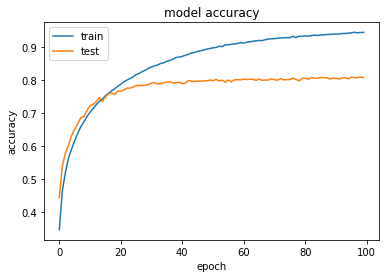

In [78]:
# summarize history for accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

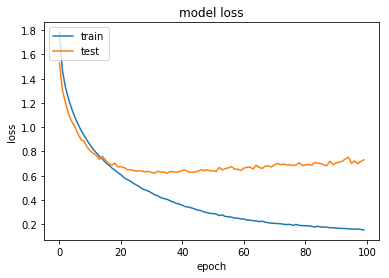

In [79]:
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()